# Machine Learning Analysis
## Consumer Purchase Prediction

This notebook implements various machine learning algorithms for predicting consumer purchase behavior.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../../data/Advertisement.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (400, 5)

First few rows:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 1. Data Preprocessing


In [2]:
# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Prepare features and target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts())
print(f"\nTarget distribution in test set:")
print(y_test.value_counts())


Training set shape: (320, 3)
Test set shape: (80, 3)

Target distribution in training set:
Purchased
0    206
1    114
Name: count, dtype: int64

Target distribution in test set:
Purchased
0    51
1    29
Name: count, dtype: int64


## 2. Model Training and Evaluation


In [3]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    # Train model
    if name == 'Logistic Regression' or name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Cross-validation score
    if name == 'Logistic Regression' or name == 'SVM':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")



Logistic Regression:
  Accuracy: 0.8000
  Precision: 0.8095
  Recall: 0.5862
  F1 Score: 0.6800
  CV Accuracy: 0.8500 (+/- 0.0897)

Random Forest:
  Accuracy: 0.9000
  Precision: 0.8387
  Recall: 0.8966
  F1 Score: 0.8667
  CV Accuracy: 0.9000 (+/- 0.1000)

SVM:
  Accuracy: 0.9125
  Precision: 0.8438
  Recall: 0.9310
  F1 Score: 0.8852
  CV Accuracy: 0.9031 (+/- 0.0956)

Naive Bayes:
  Accuracy: 0.8750
  Precision: 0.8519
  Recall: 0.7931
  F1 Score: 0.8214
  CV Accuracy: 0.8875 (+/- 0.0459)

Decision Tree:
  Accuracy: 0.8625
  Precision: 0.7647
  Recall: 0.8966
  F1 Score: 0.8254
  CV Accuracy: 0.8688 (+/- 0.1228)

Gradient Boosting:
  Accuracy: 0.9000
  Precision: 0.8387
  Recall: 0.8966
  F1 Score: 0.8667
  CV Accuracy: 0.8875 (+/- 0.1142)


## 3. Model Comparison


Model Comparison:
              Model  Accuracy  Precision   Recall  F1 Score  CV Accuracy
                SVM    0.9125   0.843750 0.931034  0.885246     0.903125
      Random Forest    0.9000   0.838710 0.896552  0.866667     0.900000
  Gradient Boosting    0.9000   0.838710 0.896552  0.866667     0.887500
        Naive Bayes    0.8750   0.851852 0.793103  0.821429     0.887500
      Decision Tree    0.8625   0.764706 0.896552  0.825397     0.868750
Logistic Regression    0.8000   0.809524 0.586207  0.680000     0.850000


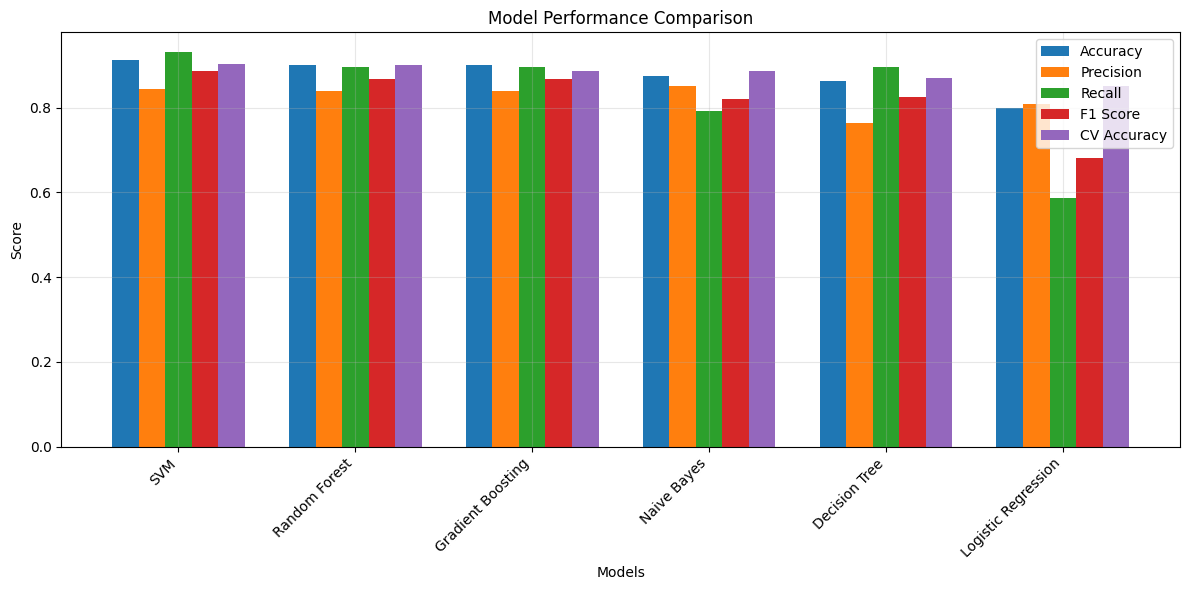

In [4]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1 Score': [results[m]['f1'] for m in results.keys()],
    'CV Accuracy': [results[m]['cv_mean'] for m in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print("Model Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_df))
width = 0.15

ax.bar(x - 2*width, comparison_df['Accuracy'], width, label='Accuracy')
ax.bar(x - width, comparison_df['Precision'], width, label='Precision')
ax.bar(x, comparison_df['Recall'], width, label='Recall')
ax.bar(x + width, comparison_df['F1 Score'], width, label='F1 Score')
ax.bar(x + 2*width, comparison_df['CV Accuracy'], width, label='CV Accuracy')

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Confusion Matrices


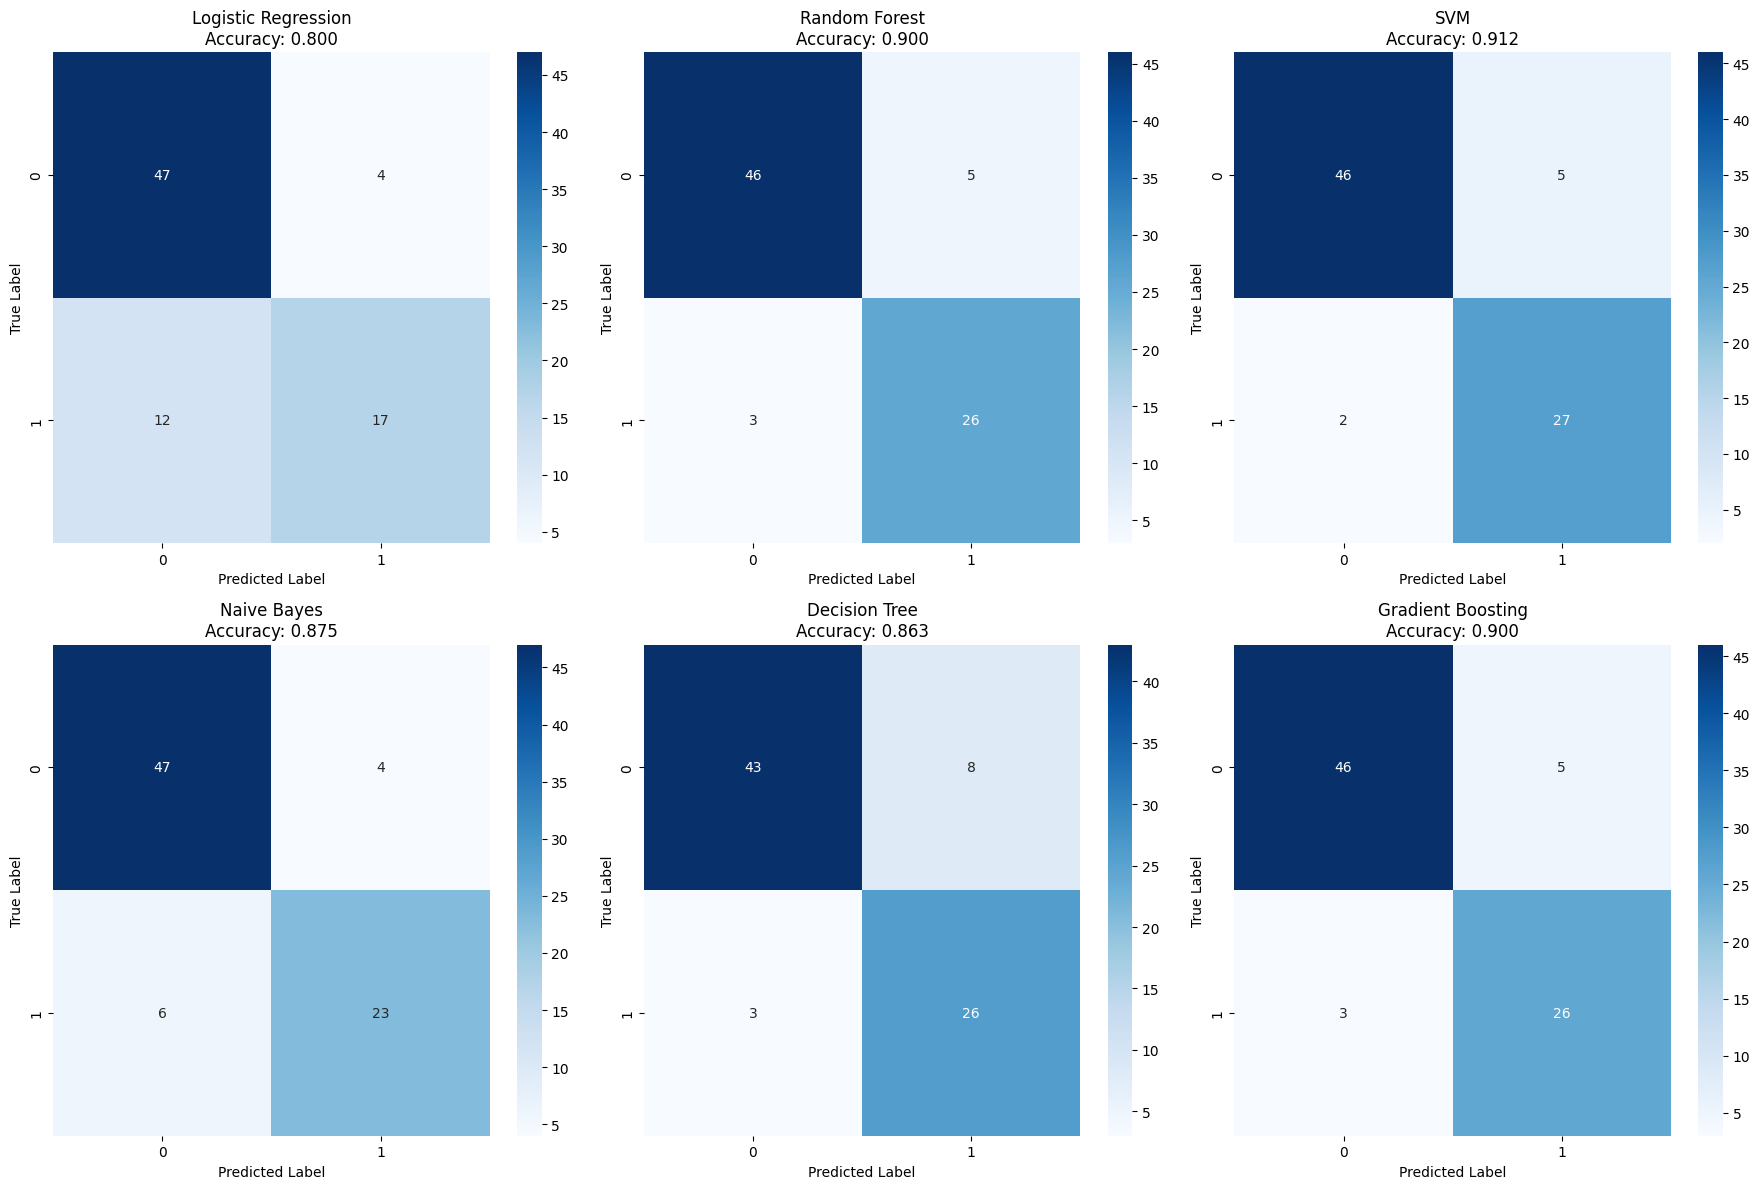

In [5]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()


## 5. ROC Curves


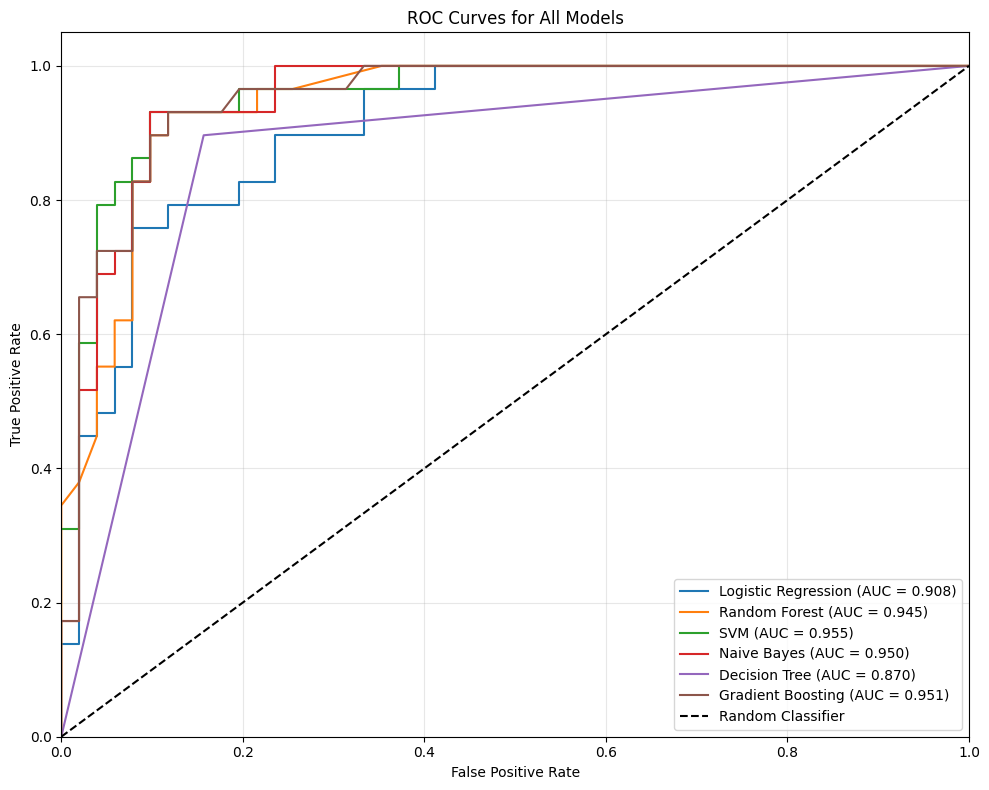

In [6]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Feature Importance (Random Forest)


Feature Importance (Random Forest):
           feature  importance
1              Age    0.499905
2  EstimatedSalary    0.491153
0           Gender    0.008942


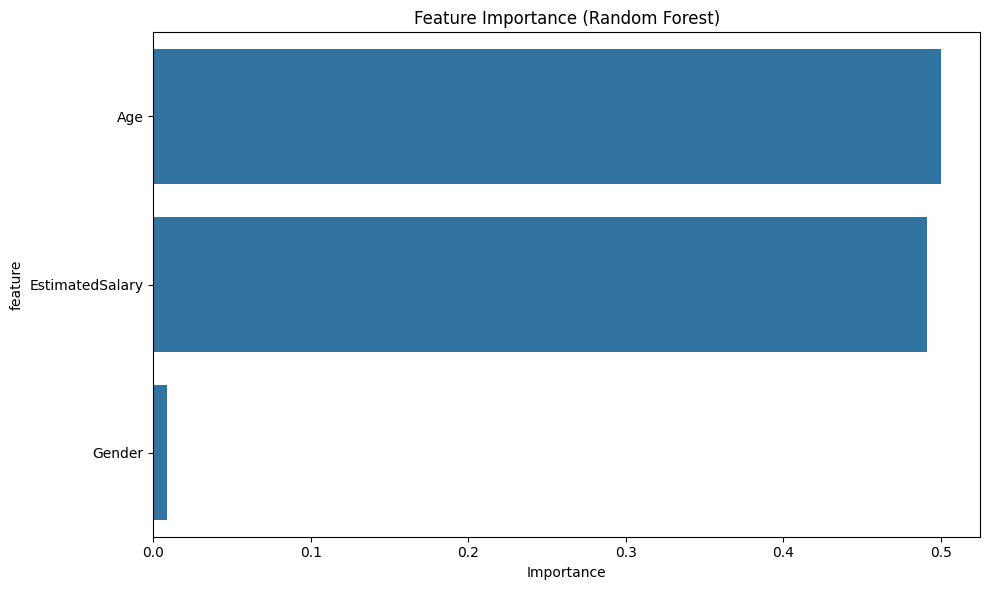

In [7]:
# Feature importance from Random Forest
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


## 7. Best Model Selection and Detailed Report


In [8]:
# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]

print(f"BEST MODEL: {best_model_name}")
print("="*50)
print(f"Accuracy: {best_model['accuracy']:.4f}")
print(f"Precision: {best_model['precision']:.4f}")
print(f"Recall: {best_model['recall']:.4f}")
print(f"F1 Score: {best_model['f1']:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, best_model['y_pred']))


BEST MODEL: SVM
Accuracy: 0.9125
Precision: 0.8438
Recall: 0.9310
F1 Score: 0.8852

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        51
           1       0.84      0.93      0.89        29

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

